# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('penguins')

In [ ]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

As we can see in our data there is a 7 column here:

species (التصنيف):a caregorical column that indicate about the penguin species (Chinstrap, Adélie, or Gentoo).

island (الجزيرة): a caregorical column that indicate about the location of penguin like  island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica).

culmen_length_mm (طول المنقار بالملي متر): a numric column that indicate about the length of the upper ridge of a bird's beak.

culmen_depth_mm  (عمق المنقار للطائر بالملي متر): a numric column that indicate about the depth of the upper ridge of a bird's beak.

flipper_length_mm	(طول الزعنفة او الأجنحة بالملي متر): a numric column that indicate about the length of the flipper (wings).

body_mass_g (كتلة الجسم): a numric column that indicate a nody mass in gram.

sex (الجنس): a caregorical column that indicate about the sex of penguin.


Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [ ]:
print('Head Data: ==================================================== ')
print(df.head())
print('Sample Data:   ====================================================')
print(df.sample(5))
print('Tail Data:   ====================================================')
print(df.tail())
print('Info Data:  ====================================================')
print(df.info())





Head Data: ==================================================== 
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
Sample Data:   ====================================================
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
52   Adelie     Biscoe            35.0           17.9              190.0   
122  Adelie  Torgersen            40.2           17.0              176.0   
273  Gentoo     Biscoe            50.1      

# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [ ]:
print('The  missing values ')
print(df.isnull().sum())
print('The percentage of missing values before handling them ')
print(df.isnull().sum() / len(df) * 100)

The  missing values 
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
The percentage of missing values before handling them 
species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64


In [ ]:
print('duplicated')
df.duplicated().sum()

duplicated


0

In [ ]:
df_num = df.select_dtypes(include ='number')
df_cat = df.select_dtypes(include = 'object')

df_num.columns
df_cat.columns

Index(['species', 'island', 'sex'], dtype='object')

In [ ]:
df_num = df[df_num.columns].fillna(df_num.mean())
df_cat = df[df_cat.columns].fillna(df_cat.mode().iloc[0])

In [ ]:
print('The missing values After processing ')
print(df_num.isnull().sum())
print(df_cat.isnull().sum())

print('The percentage of missing values avter handling them ======= ')
print(df_num.isnull().sum() / len(df) * 100)
print(df_cat.isnull().sum() / len(df) * 100)

The missing values After processing 
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64
species    0
island     0
sex        0
dtype: int64
The percentage of missing values avter handling them ======= 
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
dtype: float64
species    0.0
island     0.0
sex        0.0
dtype: float64


In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,344.0,43.921930,5.443643,32.1,39.275,44.25,48.5,59.6
bill_depth_mm,344.0,17.151170,1.969027,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,344.0,200.915205,14.020657,172.0,190.000,197.00,213.0,231.0
body_mass_g,344.0,4201.754386,799.613058,2700.0,3550.000,4050.00,4750.0,6300.0


In [ ]:
df_cat.describe().T

,count,unique,top,freq
species,344,3,Adelie,152
island,344,3,Biscoe,168
sex,344,2,Male,179


In this section we use a fill missing values.
why?
because it's a good way in this data to fill the missing data, there is no big diffrent if we use fill or drop to the (row) data, the problem is when we drop the column!!
columns is usefull data in general, and in this data every column is important.
we use fill with (mean) in numrical data, since the missing value in the columns is about 2 to every column, and by the way since there is no outliers in our data, it's ok to use mean it oherwise we should use mode.

and fill with (mode) in categorical data, since the missing value in 'sex' is just 11, so it's ok with using mode.


# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [ ]:
mem_usage_before = df.memory_usage(deep=True)
mem_usage_before

Index                 128
species               644
island                643
bill_length_mm       1376
bill_depth_mm        1376
flipper_length_mm    1376
body_mass_g          1376
sex                   576
dtype: int64

In [90]:
# convert categotical types
df_cat['species'] = df_cat['species'].astype('category')
df_cat['island'] = df_cat['island'].astype('category')
df_cat['sex'] = df_cat['sex'].astype('category')


In [91]:
# convert numerical types
df_num['bill_depth_mm'] = df_num['bill_depth_mm'].astype('float32')
df_num['bill_length_mm'] = df_num['bill_length_mm'].astype('float32')
df_num['flipper_length_mm'] = df_num['flipper_length_mm'].astype('float32')
df_num['body_mass_g'] = df_num['body_mass_g'].astype('float32')


Calculate memory saved after type conversion

In [92]:
# mem_usage_after = ...?
mem_usage_after = df.memory_usage(deep=True)
mem_usage_after

Index                 128
species               644
island                643
bill_length_mm       1376
bill_depth_mm        1376
flipper_length_mm    1376
body_mass_g          1376
sex                   576
bill_size            1376
bill_ratio           1376
dtype: int64

In [93]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')


memory saved: 0.0 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [ ]:
df_cat['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_cat['sex'].value_counts()

sex
Male      179
Female    165
Name: count, dtype: int64

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [ ]:
df_num.select_dtypes(include ='number')


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [ ]:
print('=====================================')
df_cat.select_dtypes(include = 'object')

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,Male
4,Adelie,Torgersen,Female
...,...,...,...
339,Gentoo,Biscoe,Male
340,Gentoo,Biscoe,Female
341,Gentoo,Biscoe,Male
342,Gentoo,Biscoe,Female


In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,344.0,43.921930,5.443643,32.1,39.275,44.25,48.5,59.6
bill_depth_mm,344.0,17.151170,1.969027,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,344.0,200.915205,14.020657,172.0,190.000,197.00,213.0,231.0
body_mass_g,344.0,4201.754386,799.613058,2700.0,3550.000,4050.00,4750.0,6300.0


In [79]:
df_cat.describe().T

,count,unique,top,freq
species,344,3,Adelie,152
island,344,3,Biscoe,168
sex,344,2,Male,179


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

<Axes: xlabel='species'>

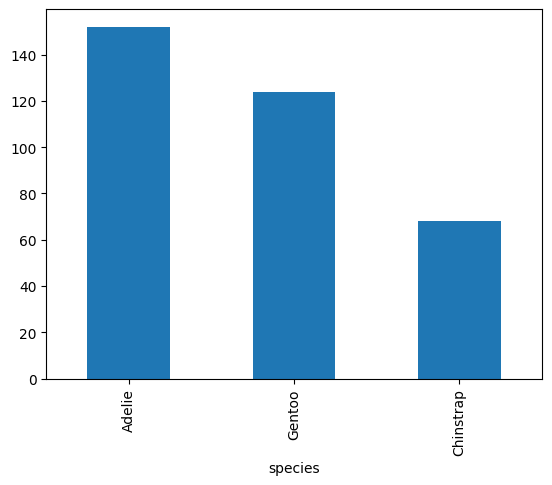

In [78]:
df_cat['species'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

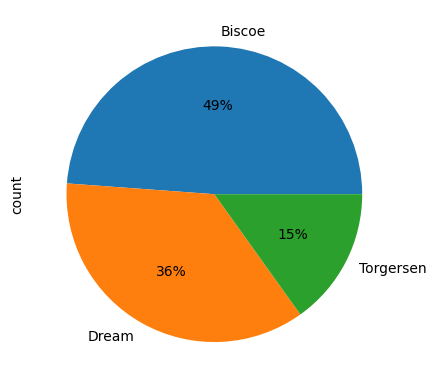

In [67]:
df_cat['island'].value_counts().plot(kind= 'pie', autopct='%1.0f%%')


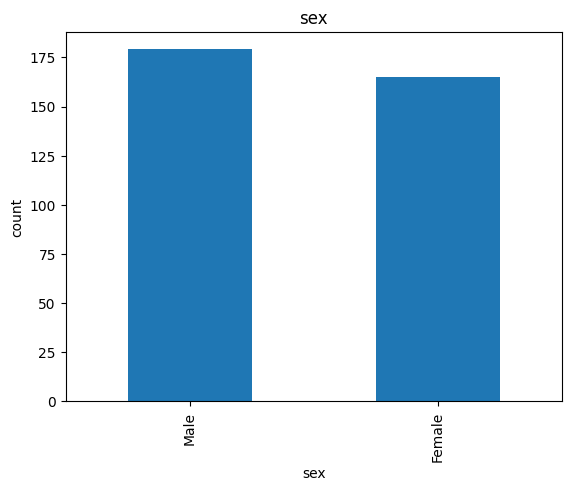

In [68]:
import matplotlib.pyplot as plt
df_cat['sex'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('sex')
plt.title('sex')
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

<Axes: >

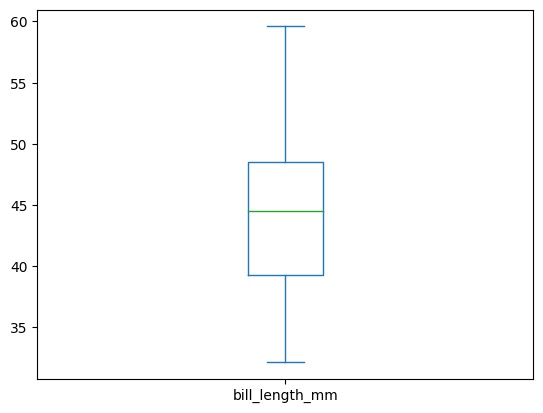

In [ ]:
df['bill_length_mm'].plot(kind='box')
#df['bill_length_mm'].plot(kind='hist')

#df['flipper_length_mm'].plot(kind='box')

#df['flipper_length_mm'].plot(kind='hist')

<Axes: ylabel='Frequency'>

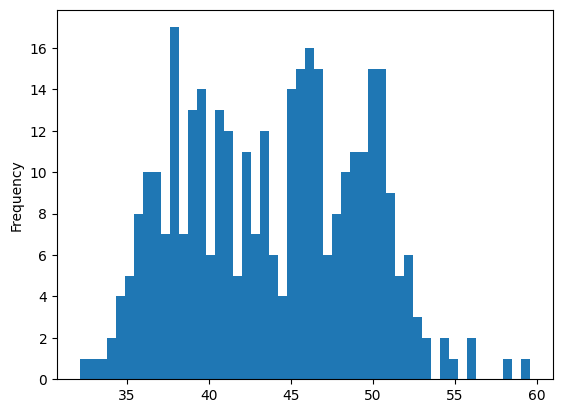

In [66]:
df_num['bill_length_mm'].plot(kind='hist', bins=50)

<Axes: >

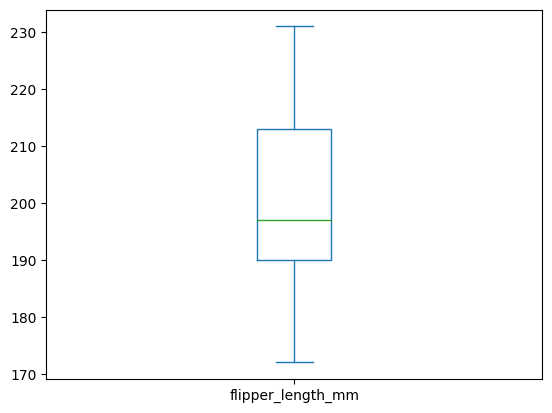

In [ ]:
df_num['flipper_length_mm'].plot(kind='box')



<Axes: ylabel='Frequency'>

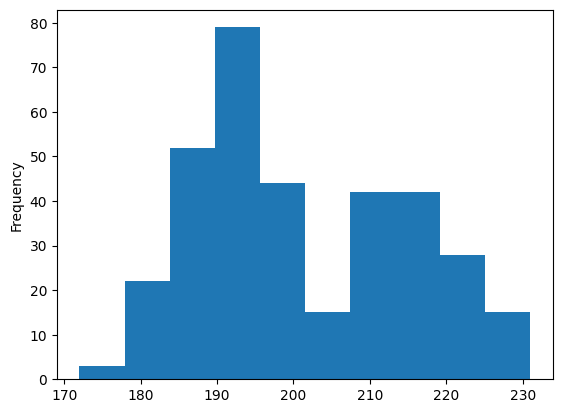

In [ ]:
df_num['flipper_length_mm'].plot(kind='hist')

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

In [72]:
df_num.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

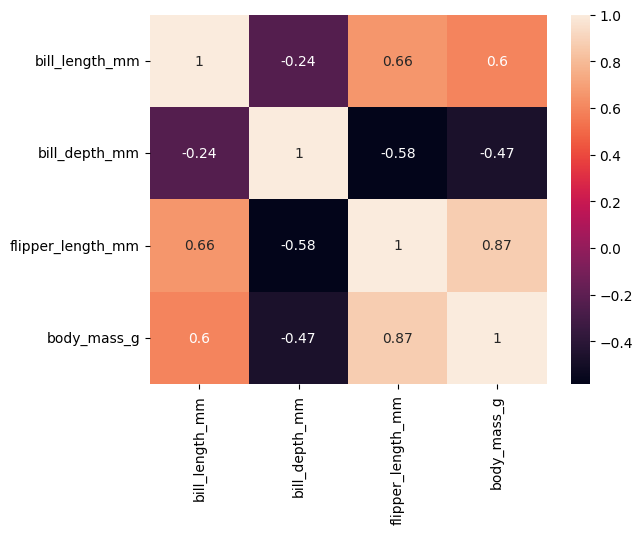

In [71]:
sns.heatmap(df_num.corr(), annot=True)

Write down your observations based on the correlation heatmap.

Observations:

As we can see here, there is a negative correlated between the bill length and bill depth.
and there is a good positive correlated betwwen flipper length, body mass with bill length.

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [80]:
df_num['bill_size'] = df_num['bill_length_mm'] * df_num['bill_depth_mm']
df_num['bill_ratio'] = df_num['bill_length_mm'] / df_num['bill_depth_mm']
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
0,39.10000,18.70000,181.000000,3750.000000,731.170000,2.090909
1,39.50000,17.40000,186.000000,3800.000000,687.300000,2.270115
2,40.30000,18.00000,195.000000,3250.000000,725.400000,2.238889
3,43.92193,17.15117,200.915205,4201.754386,753.312467,2.560871
4,36.70000,19.30000,193.000000,3450.000000,708.310000,1.901554


Let's look at the correlation to see whether the newly created features are better.

In [96]:
df_num.corr()['bill_size']

bill_length_mm       0.657274
bill_depth_mm        0.574722
flipper_length_mm    0.083154
body_mass_g          0.108206
bill_size            1.000000
bill_ratio           0.044927
Name: bill_size, dtype: float64

<Axes: >

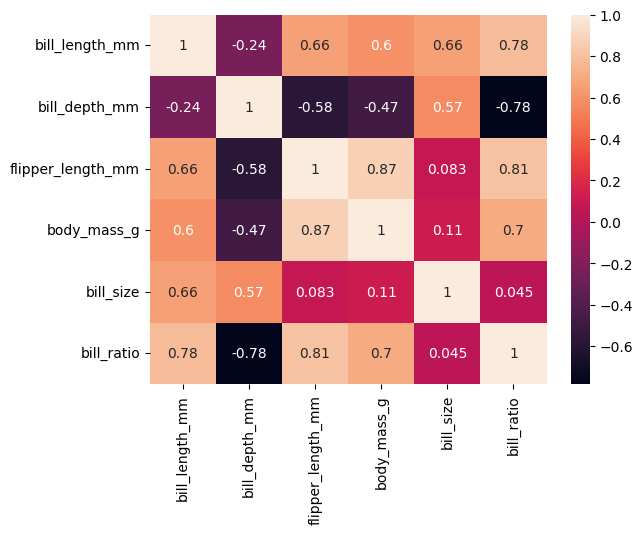

In [95]:
# This plots the correlation values for a specific column
sns.heatmap(df_num.corr(), annot=True)

# which is usually what we are interested in


We interested in bil ratio and bill size in the heatmap
so, as we can see there is a intermediate correlated between bill ration , bill size with bill length.

<Axes: >

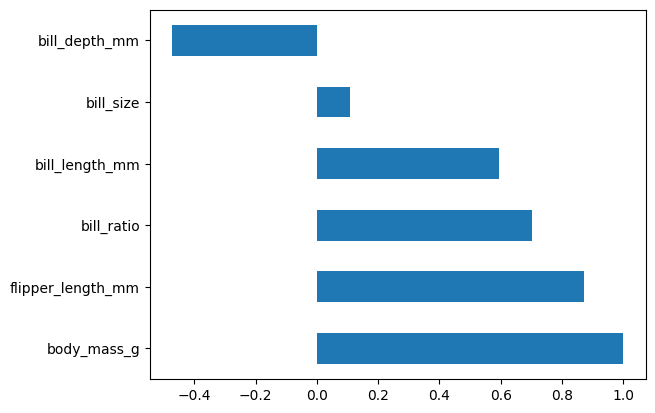

In [88]:
corr_matrix = df_num.select_dtypes('number').corr()
corr_matrix["body_mass_g"].sort_values(ascending=False).plot.barh()